In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [2]:
df4 = pd.read_csv('Friebay_team_data_4min.csv')
df14 = pd.read_csv('Friebay_team_data_14min.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

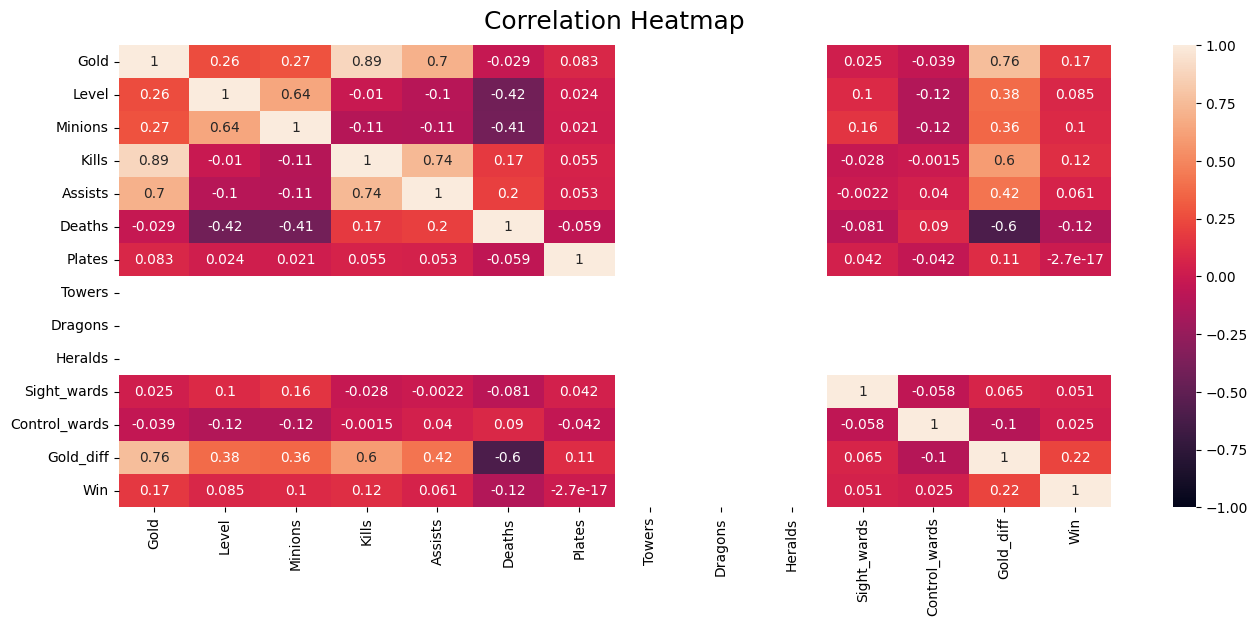

In [3]:
#Generate correlation matrix in orther to see most important values
corr4 = df4.corr()
corr14 = df14.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df4.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

In [19]:
# sns.pairplot(df)
# plt.show()

In [16]:
# corr_matrix = df.corr()
# plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
# plt.colorbar()
# plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
# plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
# plt.show()

In [20]:
# plt.figure(figsize=(12, 12))
# sns.barplot(data=df.corr().unstack().sort_values().reset_index(), x=0, y='level_0', hue='level_1', orient='h')
# plt.xlabel('Correlation')
# plt.ylabel('Variables')
# plt.title('Pairwise Correlation')
# plt.legend()
# plt.show()

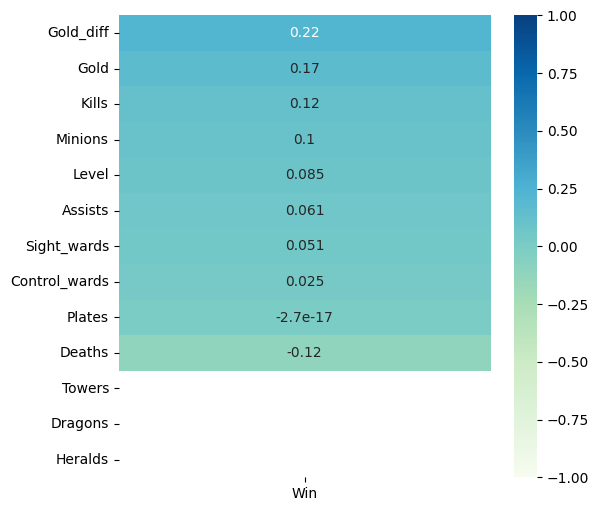

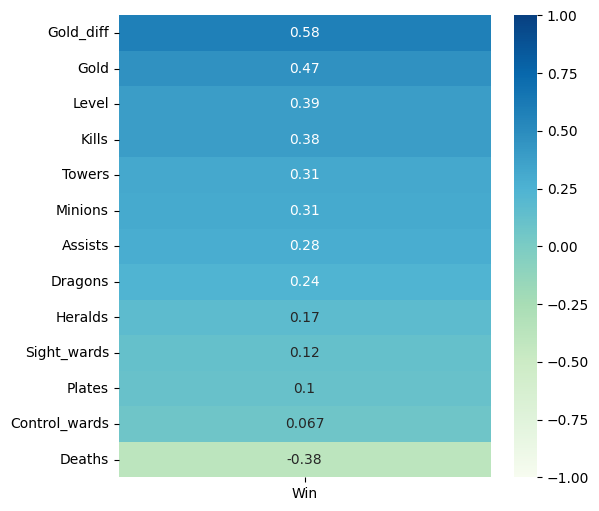

In [4]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr4["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr14["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [15]:
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [12]:
#We will first set the complete DataFrames
x_keep_original = ['Gold', 'Level', 'Minions', 'Kills', 'Assists', 'Deaths', 'Towers', 'Dragons', 'Heralds', 'Gold_diff']
X_original = df14[x_keep_original]
y_original = df14["Win"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.333333, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7430    0.7536    0.7482       211
           1     0.7426    0.7317    0.7371       205

    accuracy                         0.7428       416
   macro avg     0.7428    0.7426    0.7427       416
weighted avg     0.7428    0.7428    0.7427       416

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7865    0.6931    0.7368       101
           1     0.7395    0.8224    0.7788       107

    accuracy                         0.7596       208
   macro avg     0.7630    0.7577    0.7578       208
weighted avg     0.7623    0.7596    0.7584       208

****CONFUSION MATRIX****


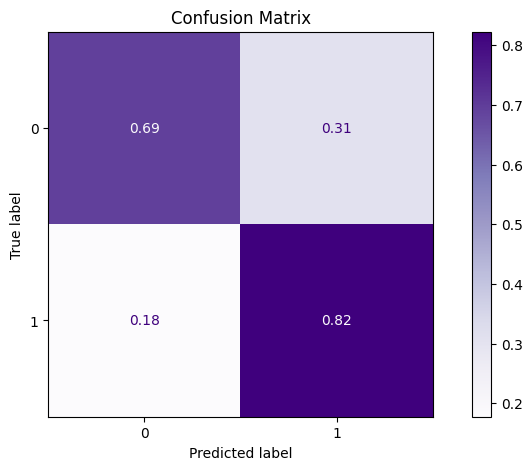

In [16]:
#Logistic regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

In [29]:
team_1 = {'Gold': 41300,
 'Level': 11.6,
 'Minions': 600,
 'Kills': 29,
 'Assists': 25,
 'Deaths': 26,
 'Towers': 0,
 'Dragons': 0,
 'Heralds': 0,
 'Gold_diff': 4184}

team_2= {'Gold': 37116,
 'Level': 11.6,
 'Minions': 530,
 'Kills': 26,
 'Assists': 26,
 'Deaths': 29,
 'Towers': 0,
 'Dragons': 0,
 'Heralds': 0,
 'Gold_diff': -4184}

In [30]:
import pandas as pd

# Create a DataFrame from the dictionary
team_1_df = pd.DataFrame(team_1, index=[0])

# Select the same features as used in training
team_1_features = team_1_df[x_keep_original]

# Make the prediction using the trained model
team1_prediction = log_select.predict(team_1_features)

# Make the prediction probabilities using the trained model
team1_prediction_probabilities = log_select.predict_proba(team_1_features)

# Get the probability of the positive class (win)
team1_win_probability = team1_prediction_probabilities[0][1]

# Display the prediction result and confidence
if team1_prediction[0] == 1:
    print("The team is predicted to win with a confidence of {:.2%}.".format(team1_win_probability))
else:
    print("The team is predicted to lose with a confidence of {:.2%}.".format(1 - team1_win_probability))
    
    
# Create a DataFrame from the dictionary
team_2_df = pd.DataFrame(team_2, index=[0])

# Select the same features as used in training
team_2_features = team_2_df[x_keep_original]

# Make the prediction using the trained model
team2_prediction = log_select.predict(team_2_features)

# Make the prediction probabilities using the trained model
team2_prediction_probabilities = log_select.predict_proba(team_2_features)

# Get the probability of the positive class (win)
team2_win_probability = team2_prediction_probabilities[0][1]

# Display the prediction result and confidence
if team2_prediction[0] == 1:
    print("The team is predicted to win with a confidence of {:.2%}.".format(team2_prediction_probabilities))
else:
    print("The team is predicted to lose with a confidence of {:.2%}.".format(1 - team2_win_probability))


The team is predicted to win with a confidence of 88.03%.
The team is predicted to lose with a confidence of 89.70%.


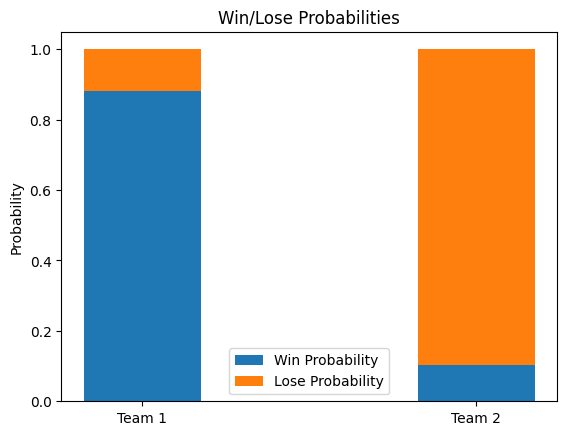

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate lose probabilities
team1_lose_probability = 1 - team1_win_probability
team2_lose_probability = 1 - team2_win_probability

# Define labels and data
labels = ["Team 1", "Team 2"]
win_probabilities = [team1_win_probability, team2_win_probability]
lose_probabilities = [team1_lose_probability, team2_lose_probability]

# Create the bar chart
x = np.arange(len(labels))
width = 0.35
fig, ax = plt.subplots()
ax.bar(x, win_probabilities, width, label="Win Probability")
ax.bar(x, lose_probabilities, width, bottom=win_probabilities, label="Lose Probability")

# Customize the plot
ax.set_ylabel("Probability")
ax.set_title("Win/Lose Probabilities")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the plot
plt.show()


****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       210
           1     1.0000    1.0000    1.0000       210

    accuracy                         1.0000       420
   macro avg     1.0000    1.0000    1.0000       420
weighted avg     1.0000    1.0000    1.0000       420

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.4907    0.5048    0.4977       105
           1     0.4902    0.4762    0.4831       105

    accuracy                         0.4905       210
   macro avg     0.4905    0.4905    0.4904       210
weighted avg     0.4905    0.4905    0.4904       210

****CONFUSION MATRIX****


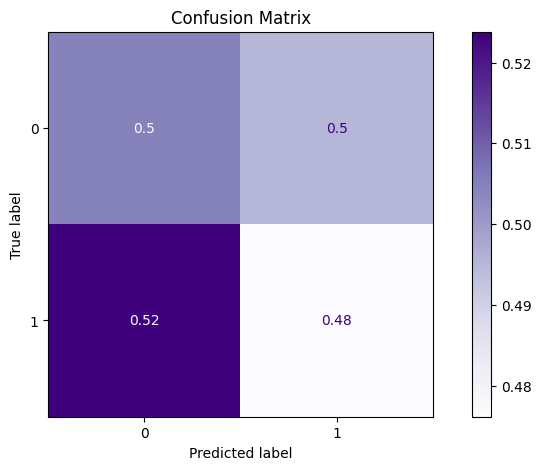

In [9]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       210
           1     1.0000    1.0000    1.0000       210

    accuracy                         1.0000       420
   macro avg     1.0000    1.0000    1.0000       420
weighted avg     1.0000    1.0000    1.0000       420

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.5897    0.6571    0.6216       105
           1     0.6129    0.5429    0.5758       105

    accuracy                         0.6000       210
   macro avg     0.6013    0.6000    0.5987       210
weighted avg     0.6013    0.6000    0.5987       210

****CONFUSION MATRIX****


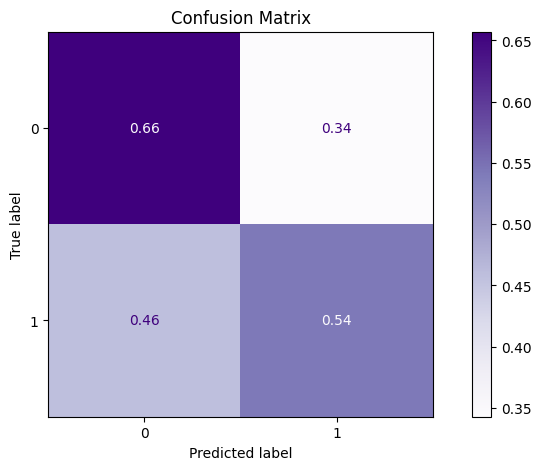

In [10]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Classification Report:
              precision    recall  f1-score   support

           0     0.7865    0.6931    0.7368       101
           1     0.7395    0.8224    0.7788       107

    accuracy                         0.7596       208
   macro avg     0.7630    0.7577    0.7578       208
weighted avg     0.7623    0.7596    0.7584       208



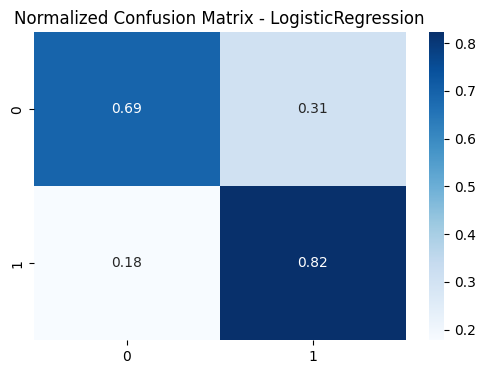

Classification Report:
              precision    recall  f1-score   support

           0     0.7303    0.6436    0.6842       101
           1     0.6975    0.7757    0.7345       107

    accuracy                         0.7115       208
   macro avg     0.7139    0.7096    0.7094       208
weighted avg     0.7134    0.7115    0.7101       208



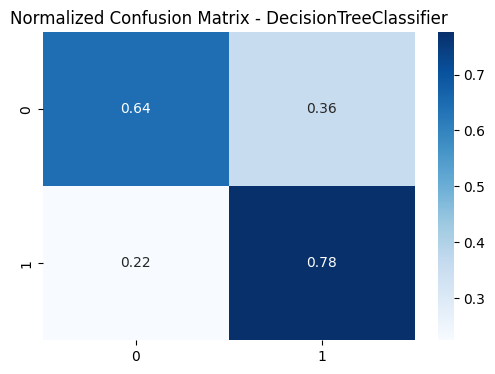

Classification Report:
              precision    recall  f1-score   support

           0    0.77551   0.75248   0.76382       101
           1    0.77273   0.79439   0.78341       107

    accuracy                        0.77404       208
   macro avg    0.77412   0.77343   0.77361       208
weighted avg    0.77408   0.77404   0.77390       208



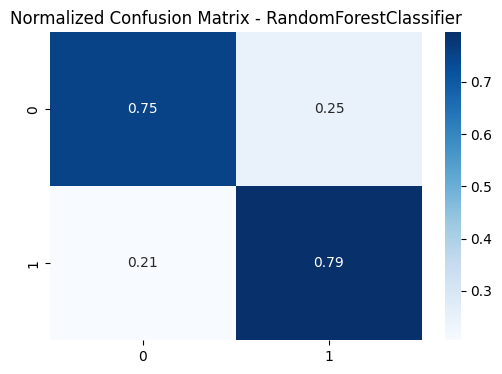

Classification Report:
              precision    recall  f1-score   support

           0    0.77273   0.67327   0.71958       101
           1    0.72500   0.81308   0.76652       107

    accuracy                        0.74519       208
   macro avg    0.74886   0.74318   0.74305       208
weighted avg    0.74818   0.74519   0.74373       208



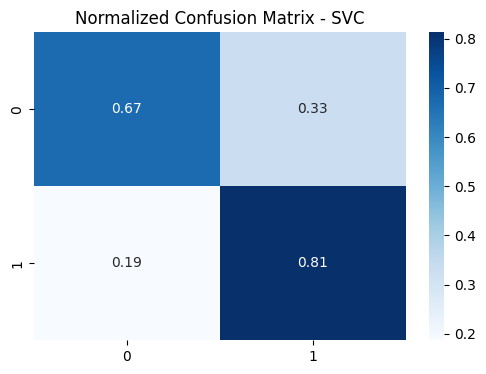

Classification Report:
              precision    recall  f1-score   support

           0    0.72165   0.69307   0.70707       101
           1    0.72072   0.74766   0.73394       107

    accuracy                        0.72115       208
   macro avg    0.72119   0.72037   0.72051       208
weighted avg    0.72117   0.72115   0.72090       208



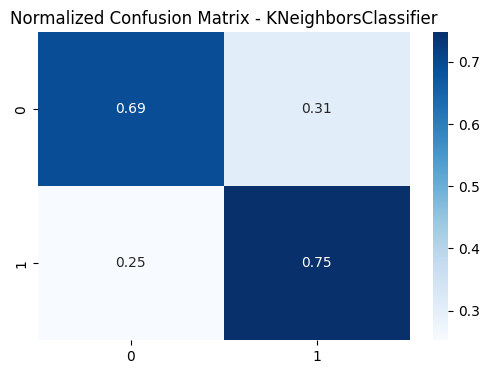

Classification Report:
              precision    recall  f1-score   support

           0    0.90909   0.39604   0.55172       101
           1    0.62805   0.96262   0.76015       107

    accuracy                        0.68750       208
   macro avg    0.76857   0.67933   0.65594       208
weighted avg    0.76452   0.68750   0.65894       208



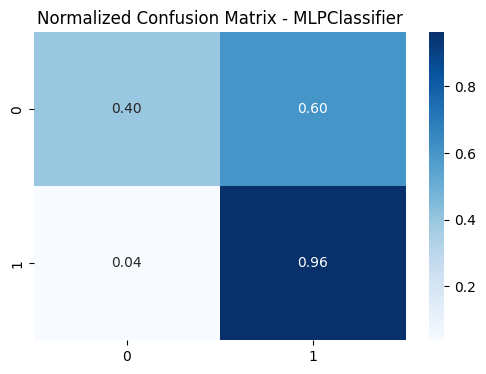

Classification Report:
              precision    recall  f1-score   support

           0    0.73737   0.72277   0.73000       101
           1    0.74312   0.75701   0.75000       107

    accuracy                        0.74038       208
   macro avg    0.74025   0.73989   0.74000       208
weighted avg    0.74033   0.74038   0.74029       208



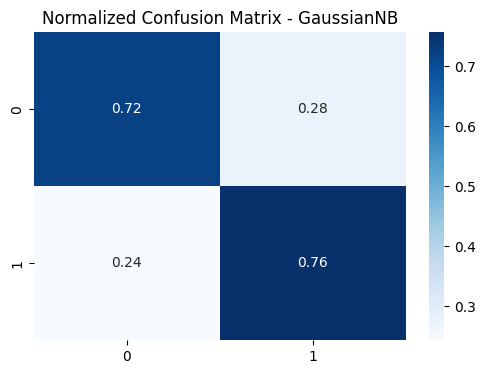

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=5):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Compute classification report
    report = classification_report(y_test, predictions, digits=digits)

    # Print formatted classification report
    print(f"Classification Report:\n{report}")

    # Compute confusion matrix
    confusion_matrix_data = confusion_matrix(y_test, predictions)

    # Normalize confusion matrix
    normalized_confusion_matrix = confusion_matrix_data.astype('float') / confusion_matrix_data.sum(axis=1)[:, np.newaxis]

    # Plot normalized confusion matrix as heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_confusion_matrix, annot=True, cmap='Blues', fmt='.2f')
    plt.title(f"Normalized Confusion Matrix - {type(model).__name__}")
    plt.show()

# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
evaluate_model(logistic_model, X_train, y_train, X_test, y_test, digits=4)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
evaluate_model(decision_tree_model, X_train, y_train, X_test, y_test, digits=4)

# Random Forest
random_forest_model = RandomForestClassifier()
evaluate_model(random_forest_model, X_train, y_train, X_test, y_test)

# Support Vector Machines (SVM)
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, y_train, X_test, y_test)

# Neural Networks
neural_network_model = MLPClassifier()
evaluate_model(neural_network_model, X_train, y_train, X_test, y_test)

# Naive Bayes
naive_bayes_model = GaussianNB()
evaluate_model(naive_bayes_model, X_train, y_train, X_test, y_test)